# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "E:/AV/DataSetExploration/drone-dataset-tools/data/location-2/home"

dataDir = "/home/office/AV/DataSetExploration/data/ind/location-2/csv"

In [2]:
exec(open('init_notebook.py').read())

current working dir/home/office/AV/DataSetExploration/TTI-dataset-tools/src


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from tti_dataset_tools.TrajectoryTransformer import TrajectoryTransformer
from tti_dataset_tools.TrajectoryVisualizer import TrajectoryVisualizer
from tti_dataset_tools.TrajectoryCleaner import TrajectoryCleaner
from tti_dataset_tools.ColMapper import ColMapper

In [5]:
from ind_tools.IndTransformer import IndTransformer

In [6]:
sceneId = 40
date = "2022-12-22"
fps=5
minYDisplacement = 3.5
maxXDisplacement = 9
pedDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-pedestrians.csv"))
otherDf = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-others.csv"))
tracksMeta = pd.read_csv(os.path.join(dataDir, f"{date}-fps-{fps}-scene-{sceneId}-meta.csv"))


In [7]:
visualizer = TrajectoryVisualizer()
colMapper = ColMapper(
        idCol='uniqueTrackId', 
        xCol='sceneX', 
        yCol='sceneY',
        xVelCol='sceneXVelocity', 
        yVelCol='sceneYVelocity', 
        speedCol='speed'
    )
transformer = TrajectoryTransformer(colMapper)
cleaner = TrajectoryCleaner(
    colMapper = colMapper,
    minSpeed = 0.0, # we can consider them as obstacles
    maxSpeed = 3.5,
    minYDisplacement = minYDisplacement,
    maxXDisplacement = maxXDisplacement
)

indTransformer = IndTransformer(colMapper)

In [8]:
transformer.deriveSpeed(pedDf)
transformer.deriveDisplacements(pedDf)
pedDf.describe()

,recordingId,frame,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneXVelocity,sceneYVelocity,sceneXAcceleration,sceneYAcceleration,speed,displacementX,displacementY
count,3961.000000,3961.000000,3961.000000,3961.0,3961.0,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,24.212068,15360.254734,24484.550619,40.0,6.0,1.224852,0.010834,0.098494,0.237502,-0.001815,0.017146,1.460238,0.734783,2.892899
std,3.465336,9297.291987,3495.473453,0.0,0.0,1.593034,1.828166,0.464555,1.391462,0.272482,0.300141,0.292009,0.778701,1.822267
min,18.000000,210.000000,18061.000000,40.0,6.0,-4.582302,-3.343402,-1.625169,-2.619888,-1.236708,-2.023122,0.032391,0.000000,0.000000
25%,21.000000,7294.000000,21463.000000,40.0,6.0,0.269662,-1.557953,-0.167212,-1.306313,-0.159554,-0.123242,1.303674,0.180108,1.299463
50%,24.000000,14899.000000,24244.000000,40.0,6.0,1.375110,0.030452,0.135524,1.139997,-0.005116,0.019357,1.475235,0.505295,2.828910
75%,27.000000,23083.000000,27570.000000,40.0,6.0,2.468751,1.591463,0.405128,1.441246,0.155865,0.160984,1.638818,1.031138,4.451413
max,29.000000,32308.000000,29577.000000,40.0,6.0,4.846304,3.366634,1.506374,3.008293,1.514352,1.683262,3.068278,6.014081,6.349306


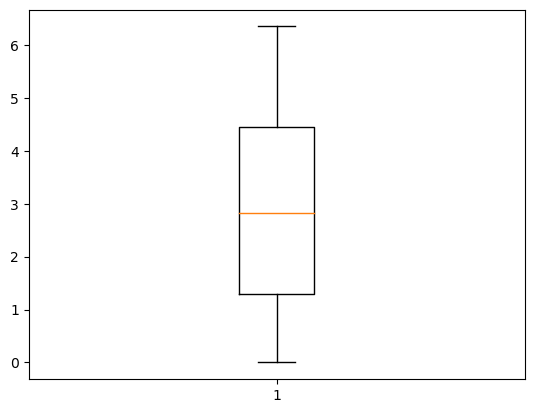

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff28f623880>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff28f6591f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff28f623940>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff28f659af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff28f659850>],
 'means': []}

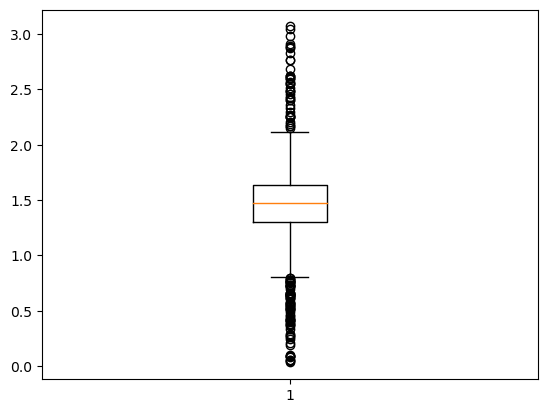

In [9]:
plt.boxplot(pedDf['displacementY'])
plt.show()
plt.boxplot(pedDf['speed'])

## Preprocessing data
### 1. Transform to local coordinate system

In [10]:
# transformer.translateAllToLocalSource(pedDf)

# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
# visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

### 2. Derive displacement in local coordinate system again.

In [11]:
# transformer.deriveDisplacementsInLC(pedDf)

### 1. filter out data with low Y displacement

using min Y displacement (3.5)


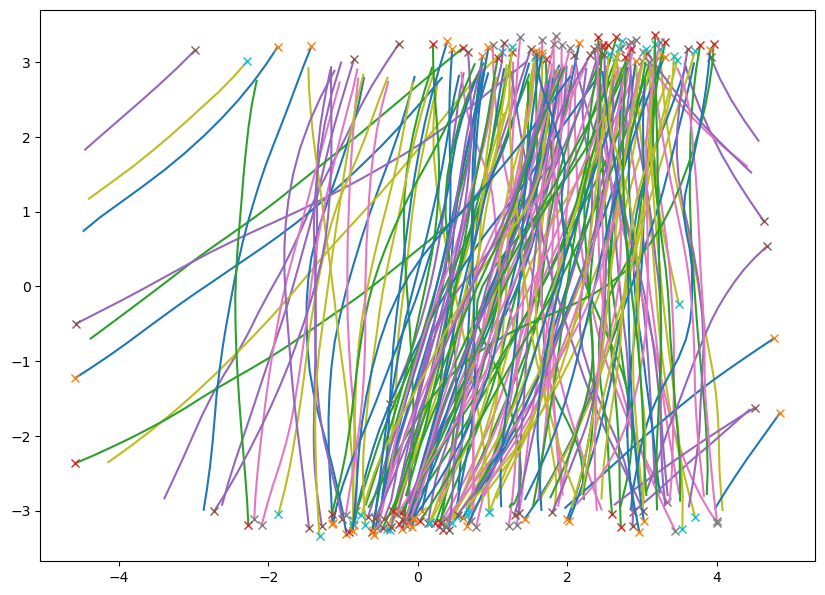

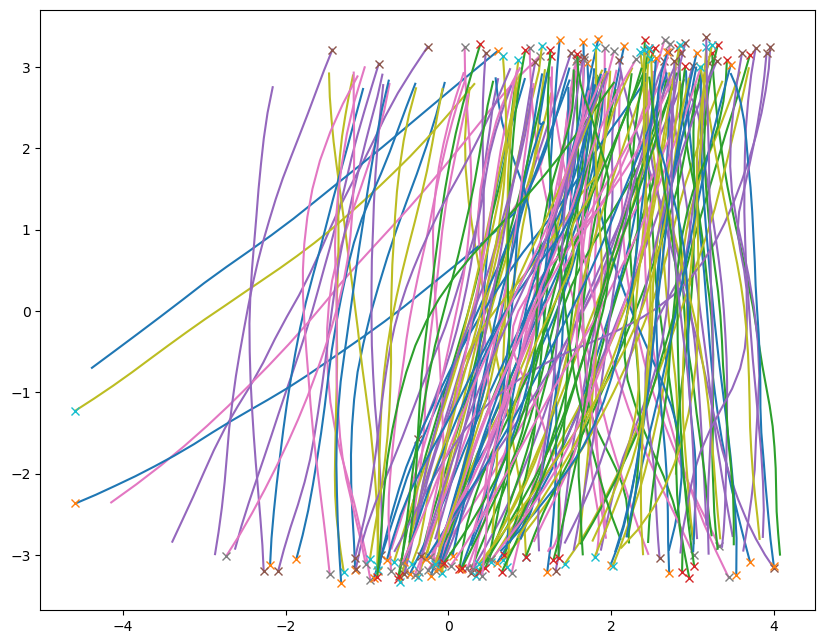

In [12]:
cleanPedDf = cleaner.cleanByYDisplacement(pedDf, byIQR=False)
visualizer.show(pedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'sceneX', yCol = 'sceneY')

### 2. Transform trajectories to local source coordinate system

In [13]:
allPedIds = list(cleanPedDf["uniqueTrackId"].unique())
transformer.translateAllToLocalSource(cleanPedDf)
# cleanPedDf.head()

In [14]:
# tracksMeta.head()

In [15]:
# tracksMeta[(tracksMeta['verticalDirection'] == 'NORTH') & (tracksMeta['class'] == 'pedestrian')]

In [16]:
# allPedIds

### 3. Rotate north-south trajectories to south-north trajectories

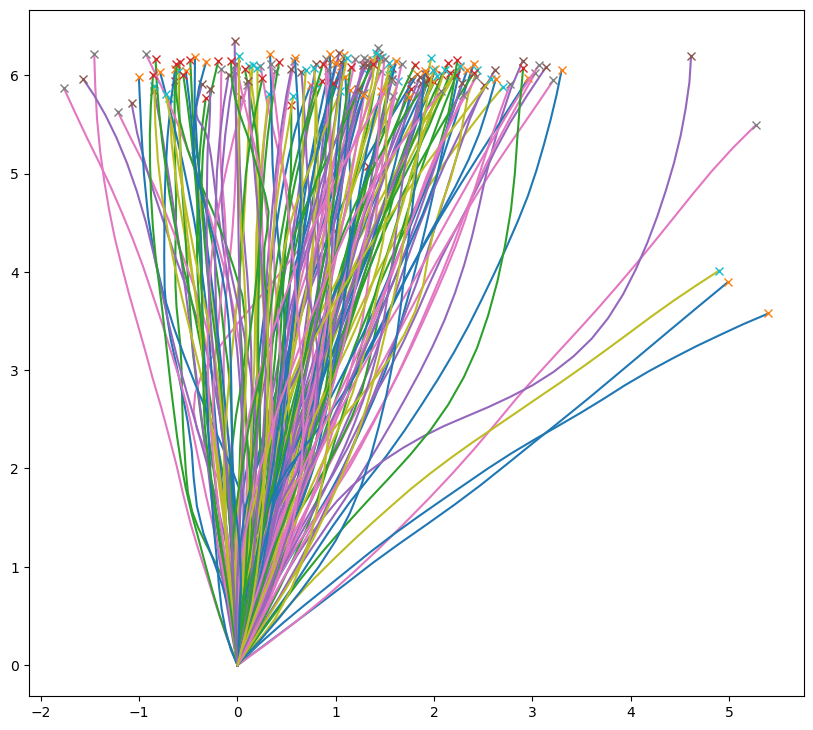

In [17]:
southIds = indTransformer.convertLocalToNorth(cleanPedDf, tracksMeta)
visualizer.show(cleanPedDf, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

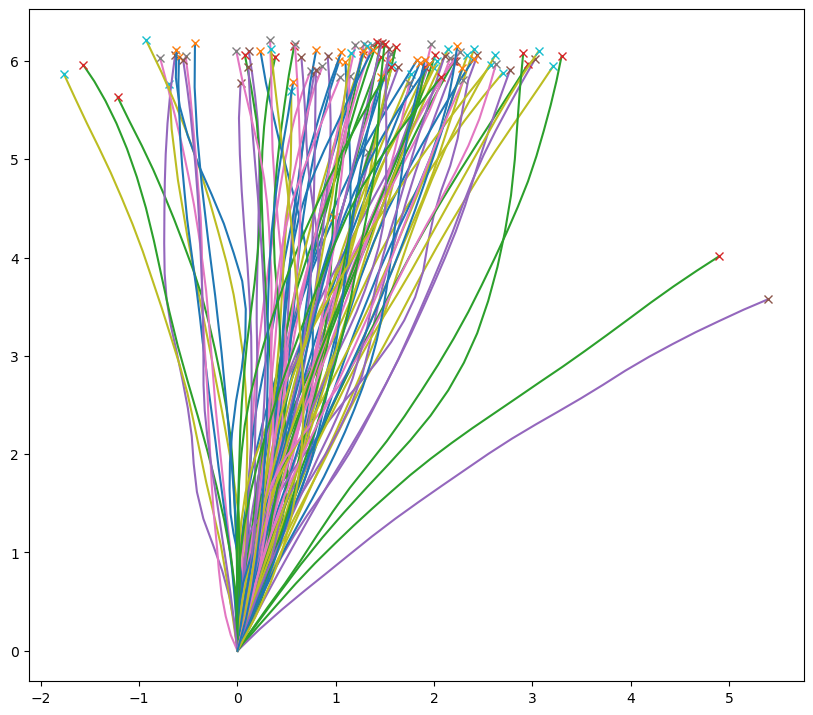

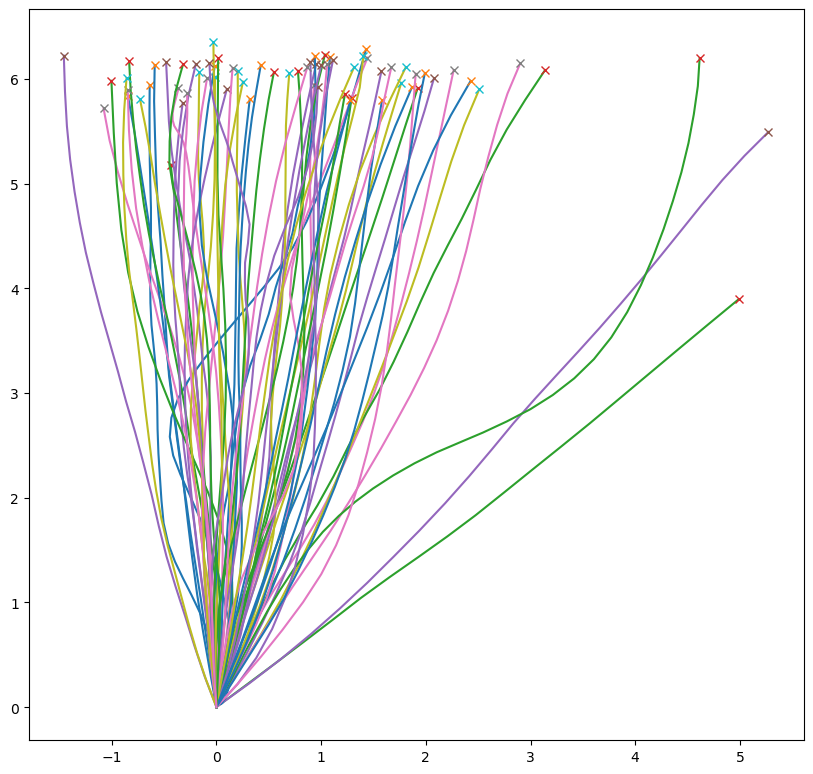

In [18]:
southPeds = cleanPedDf[cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(southPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')
northPeds = cleanPedDf[~cleanPedDf["uniqueTrackId"].isin(southIds)]
visualizer.show(northPeds, idCol = 'uniqueTrackId', xCol = 'localX', yCol = 'localY')

### 4. Shape Analysis from Local Source

### Shape dependencies:
1. Crosswalk / Midblock
2. Crosswalk - on-coming start/end, driving lane near/far
3. Crosswalk - discontinued on left/right (can distinuation point be an input?)
4. Width

### 5. Modeling approaches
1. Polygon
2. Influence heatmap (each point on a trajectory has a influence area, we need to define a datastructure for it) (or not)
3. 

In [20]:
df = southPeds.pivot("localX", "localY", "speed")

/tmp/ipykernel_20704/2292013385.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = southPeds.pivot("localX", "localY", "speed")


ValueError: Index contains duplicate entries, cannot reshape